# Опорный пример для выполнения лабораторной работы по визуализации данных

**1. Текстовое описание набора данных**

Я выбрала датасет "World Happiness Report" - рейтинг счастья и оценки по странам - https://www.kaggle.com/unsdsn/world-happiness

Датасет состоит из трех файлов:
2015.xls - рейтинг счастья и оценки по странам за 2015 год (проведу исследования данных этого файла)
2016.xls - рейтинг счастья и оценки по странам за 2016 год
2017.xls - рейтинг счастья и оценки по странам за 2017 год

Каждый файл содержит следующие колонки:
* Country - Страна
* Region - регион, к которому относится страна
* Happiness Rank - ранг страны на основе показателя счастья - **целевой признак**
* Happiness Score - показатель, измеренный в 2015 году, на ответах опрошенных людей на вопрос: «Как бы вы оценили свое счастье по шкале от 0 до 10, где 10 - наибольшее»
* Standard Error - стандартная ошибка оценки счастья
* Economy (GDP per Capita) - степень, с которой ВВП влияет на расчет показателя счастья
* Family - степень, с которой семья способствует вычислению показателя счастья
* Health (Life Expectancy) - продолжительность жизни - степень, с которой ожидаемая продолжительность жизни способствовала вычислению показателя счастья
* Freedom - степень, с которой свобода способствовала вычислению показателя счастья
* Trust (Government Corruption) - степень, с котрой восприятие коррупции способствовало вычислению показателя счастья
* Generosity - степень, с котрой щедрость способствовала вычислению показателя счастья
* Dystopia Residual - степень, с котрой остаточная дистопия способствовала вычислению показателя счастья


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# загрузка данных
data = pd.read_csv(r'C:\Users\pisar\Desktop\ML\Лабы\Лаб1\data\2015.csv', sep=",", engine='python')

**2. Основные характеристики датасета**

In [12]:
# Первые 5 строк датасета
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
# Размер датасета - 158 строк, 12 колонок
data.shape

(158, 12)

In [14]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 158


In [15]:
# Список колонок
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [16]:
# Список колонок с типами данных
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [18]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
# Итог: датасет заполнен полностью

Country - 0
Region - 0
Happiness Rank - 0
Happiness Score - 0
Standard Error - 0
Economy (GDP per Capita) - 0
Family - 0
Health (Life Expectancy) - 0
Freedom - 0
Trust (Government Corruption) - 0
Generosity - 0
Dystopia Residual - 0


In [19]:
# Основные статистические характеристки набора данных
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [40]:
# Определим уникальные значения для целевого признака - Happiness Rank
data['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158], dtype=int64)

Целевой признак содержит значения от 2.839 до 7.587

**3. Визуальное исследование датасета**


### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

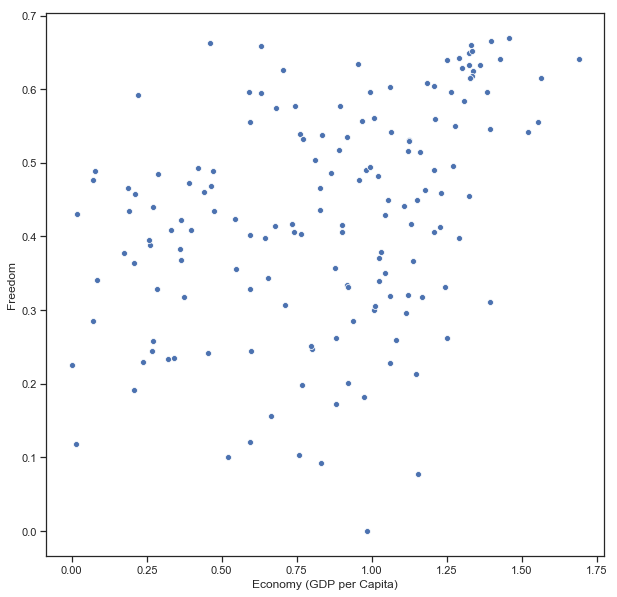

In [4]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Economy (GDP per Capita)', y='Freedom', data=data)

Между полями зависимости нет

Посмотрим насколько на эту зависимость влияет целевой признак.

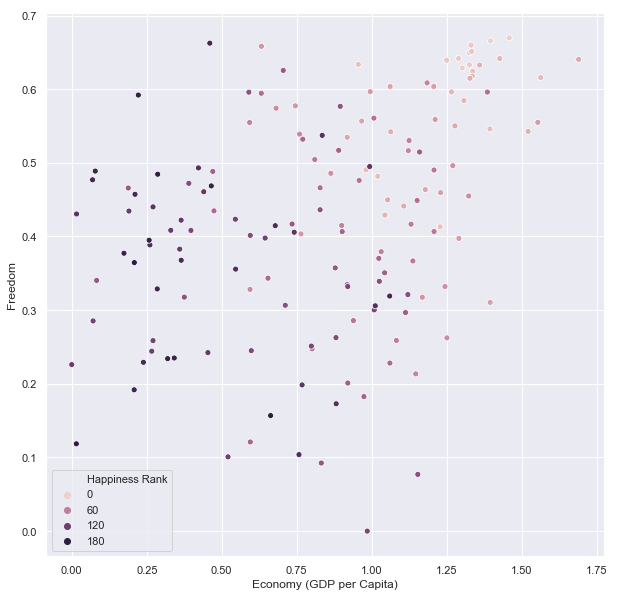

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Economy (GDP per Capita)', y='Freedom', data=data, hue='Happiness Rank')

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

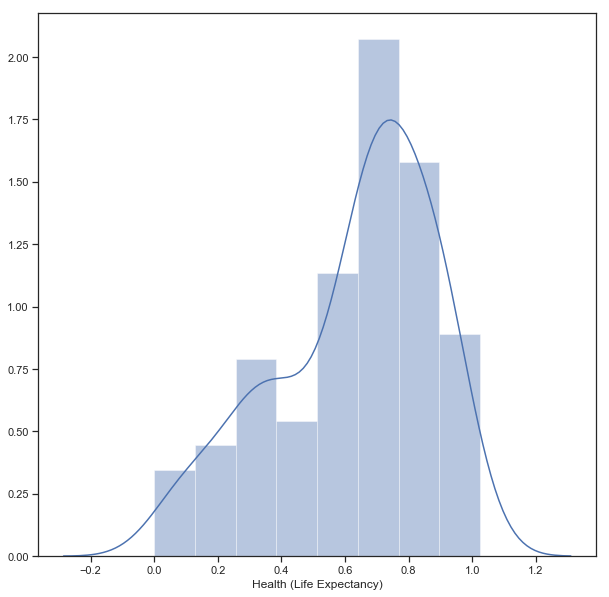

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Health (Life Expectancy)'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

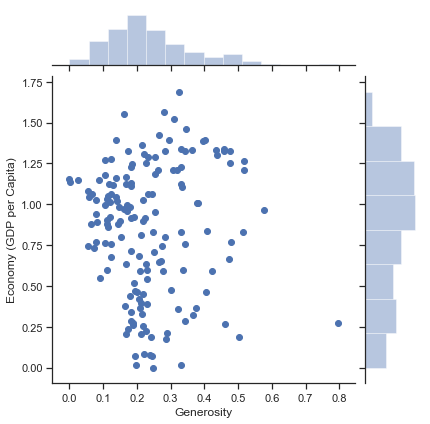

In [10]:
sns.jointplot(x='Generosity', y='Economy (GDP per Capita)', data=data)

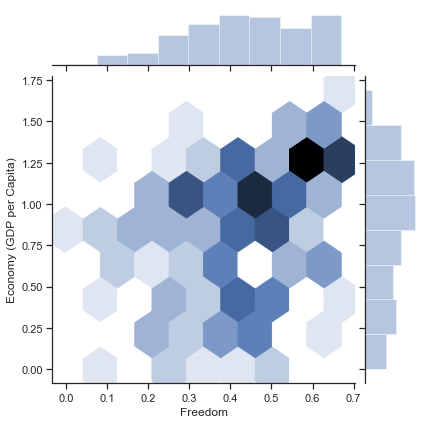

In [11]:
sns.jointplot(x='Freedom', y='Economy (GDP per Capita)', data=data, kind="hex")

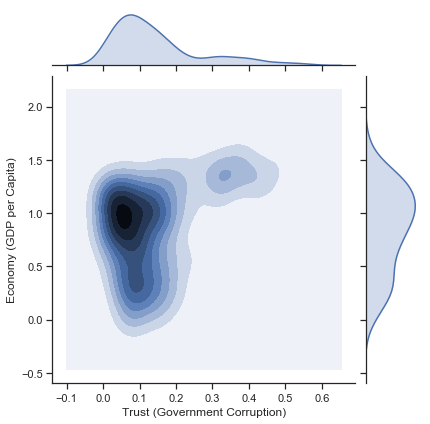

In [12]:
sns.jointplot(x='Trust (Government Corruption)', y='Economy (GDP per Capita)', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

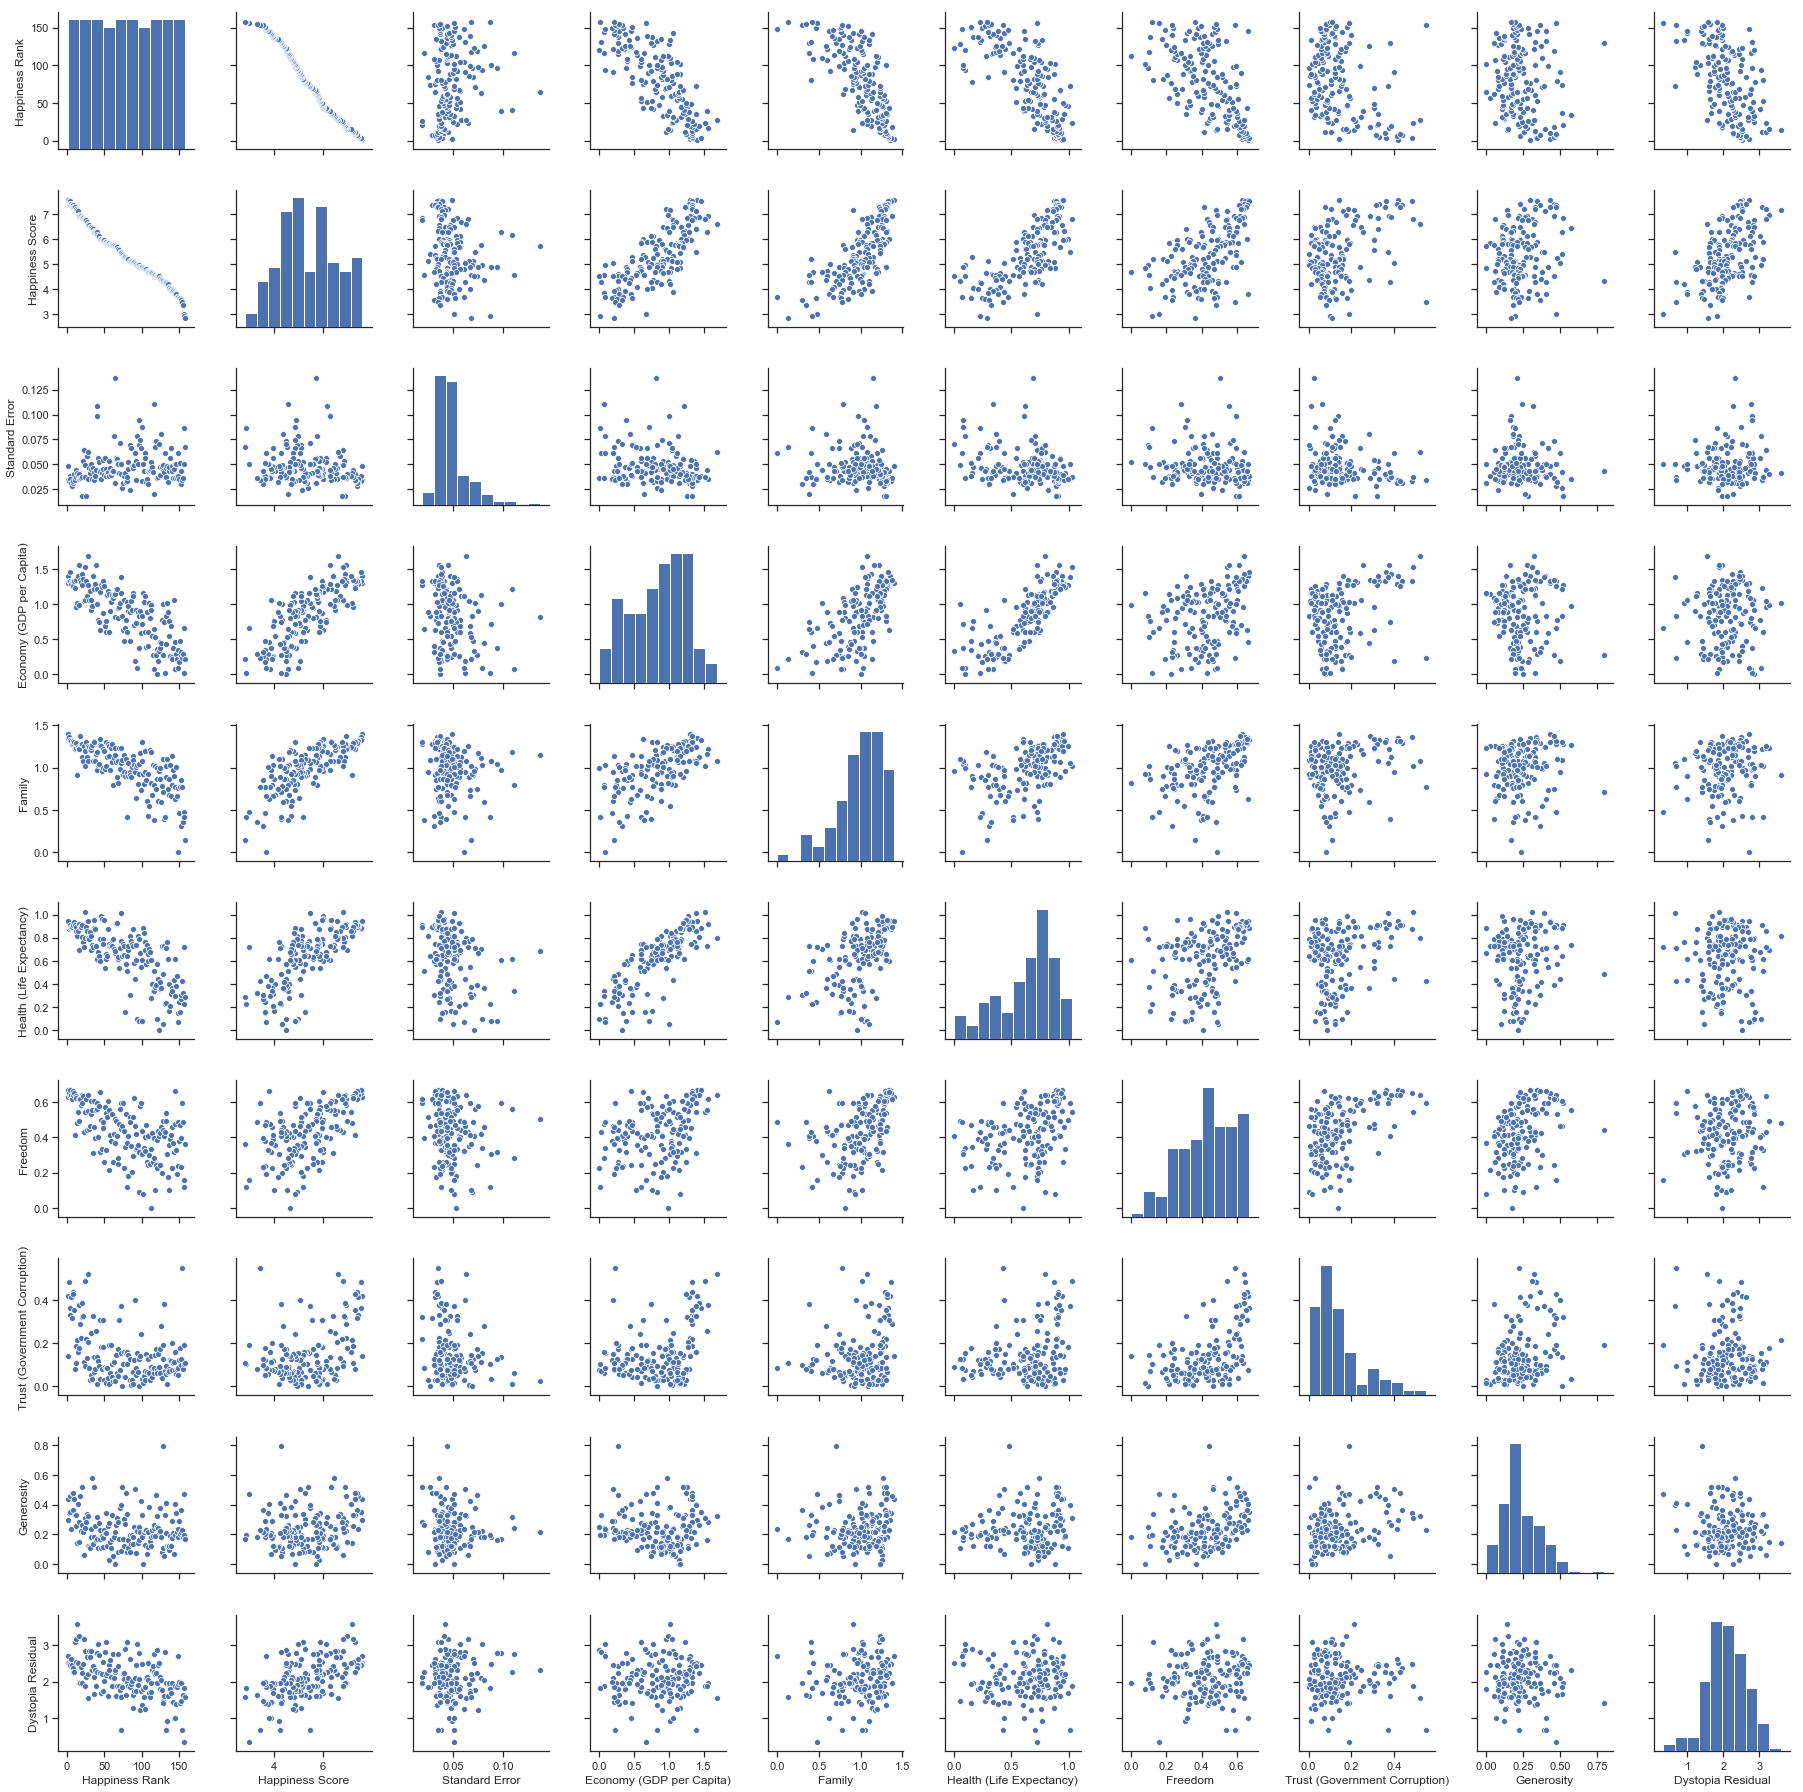

In [4]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака. В данном датасете нет бинарных признаков, следовательно у всех признаков множество значений, что не позволяет корректно отобразить данный график с параметром hue.

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

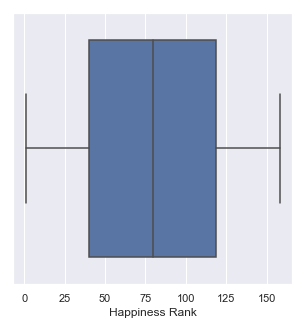

In [44]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x=data['Happiness Rank'])

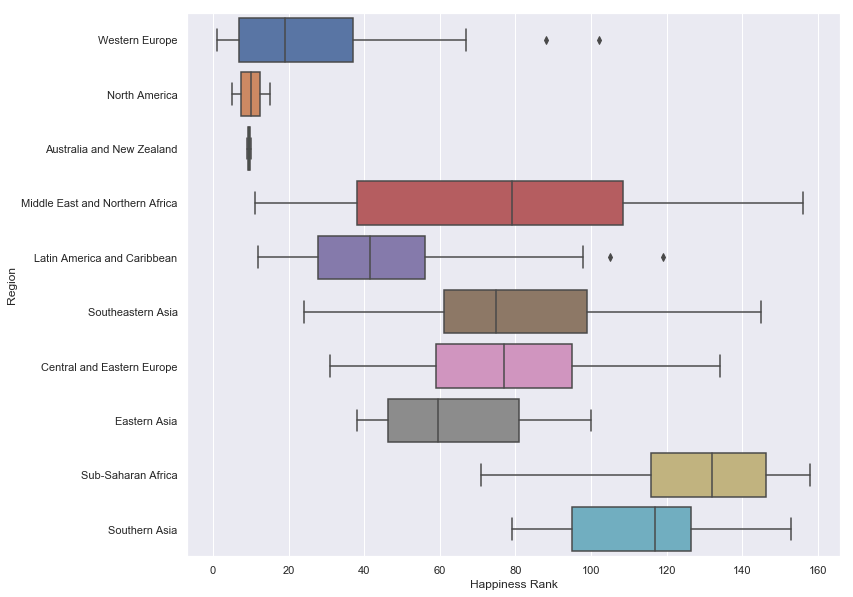

In [49]:
sns.set(rc={'figure.figsize':(11.7,10)})
# Распределение параметра Happiness Rank сгруппированные по Region
sns.boxplot(x='Happiness Rank', y='Region', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

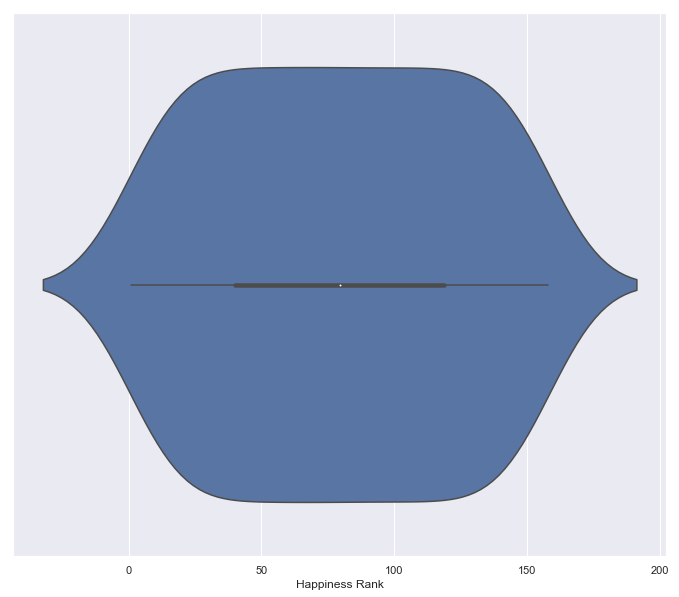

In [50]:
sns.violinplot(x=data['Happiness Rank'])

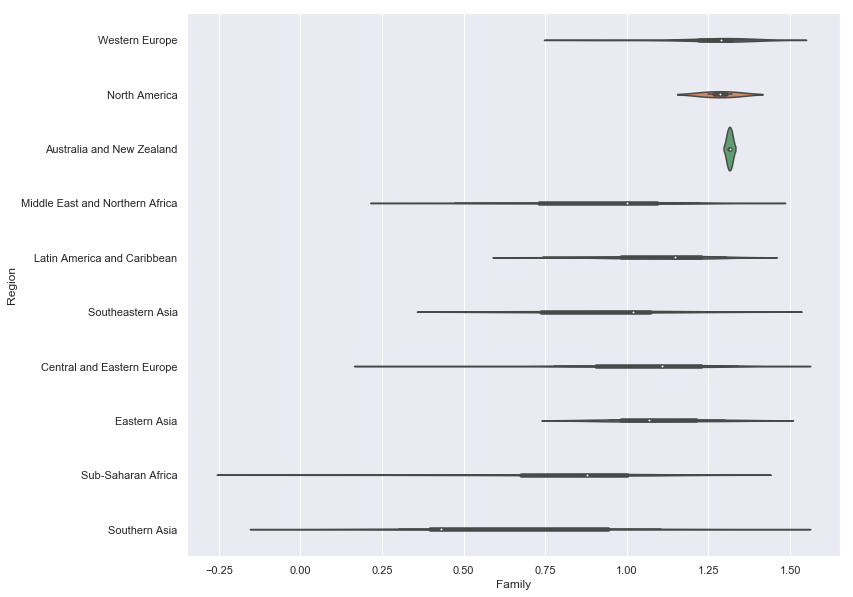

In [22]:
# Распределение параметра Family сгруппированные по Region.
sns.violinplot(x='Family', y='Region', data=data)

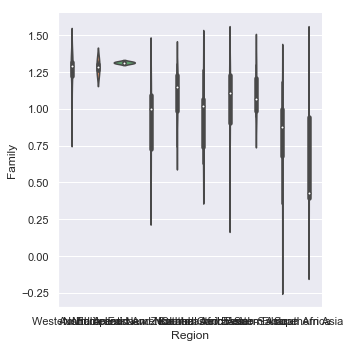

In [30]:
sns.catplot(y='Family', x='Region', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком. Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [31]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак Happiness Rank ни с чем сильно не коррелирует, но он является производным от признака оценки счастья Happiness Score, поэтому будем оценивать корреляцию по Happiness Score.
- Happiness Score наиболее сильно коррелирует с показателем ВВП (0.78), семьей (0.74) и продолжительностью жизни (0.72). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с степенью свободы (0.56) и степенью дистопии (0.53). Эти признаки стоит также оставить в модели.
- Скорее всего остальные признаки стоит исключить из модели, т.к. их коэффициенты корреляции слищком малы. Возможно они только ухудшат качество модели.

In [32]:
data.corr(method='pearson')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [33]:
data.corr(method='kendall')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-1.000000,0.147823,-0.592945,-0.577303,-0.554185,-0.413465,-0.193920,-0.112719,-0.371377
Happiness Score,-1.000000,1.000000,-0.147823,0.592945,0.577303,0.554185,0.413465,0.193920,0.112719,0.371377
Standard Error,0.147823,-0.147823,1.000000,-0.158381,-0.148381,-0.201210,-0.125640,-0.097339,-0.071449,-0.018548
Economy (GDP per Capita),-0.592945,0.592945,-0.158381,1.000000,0.485286,0.652772,0.286302,0.142552,-0.005241,0.053455
Family,-0.577303,0.577303,-0.148381,0.485286,1.000000,0.407176,0.369830,0.123523,0.096348,0.125695
Health (Life Expectancy),-0.554185,0.554185,-0.201210,0.652772,0.407176,1.000000,0.271074,0.107805,0.070631,0.052248
Freedom,-0.413465,0.413465,-0.125640,0.286302,0.369830,0.271074,1.000000,0.325580,0.283399,0.062807
Trust (Government Corruption),-0.193920,0.193920,-0.097339,0.142552,0.123523,0.107805,0.325580,1.000000,0.142068,0.039831
Generosity,-0.112719,0.112719,-0.071449,-0.005241,0.096348,0.070631,0.283399,0.142068,1.000000,0.005079
Dystopia Residual,-0.371377,0.371377,-0.018548,0.053455,0.125695,0.052248,0.062807,0.039831,0.005079,1.000000


In [34]:
data.corr(method='spearman')

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-1.000000,0.215198,-0.795703,-0.770038,-0.756960,-0.576352,-0.302397,-0.172463,-0.532487
Happiness Score,-1.000000,1.000000,-0.215198,0.795703,0.770038,0.756960,0.576352,0.302397,0.172463,0.532487
Standard Error,0.215198,-0.215198,1.000000,-0.219528,-0.213146,-0.290820,-0.186721,-0.146096,-0.113474,-0.022128
Economy (GDP per Capita),-0.795703,0.795703,-0.219528,1.000000,0.681042,0.847096,0.415421,0.227675,0.012482,0.077430
Family,-0.770038,0.770038,-0.213146,0.681042,1.000000,0.585431,0.528139,0.184599,0.146399,0.190534
Health (Life Expectancy),-0.756960,0.756960,-0.290820,0.847096,0.585431,1.000000,0.399800,0.168847,0.110256,0.078333
Freedom,-0.576352,0.576352,-0.186721,0.415421,0.528139,0.399800,1.000000,0.463745,0.418458,0.095441
Trust (Government Corruption),-0.302397,0.302397,-0.146096,0.227675,0.184599,0.168847,0.463745,1.000000,0.213357,0.054815
Generosity,-0.172463,0.172463,-0.113474,0.012482,0.146399,0.110256,0.418458,0.213357,1.000000,0.008091
Dystopia Residual,-0.532487,0.532487,-0.022128,0.077430,0.190534,0.078333,0.095441,0.054815,0.008091,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

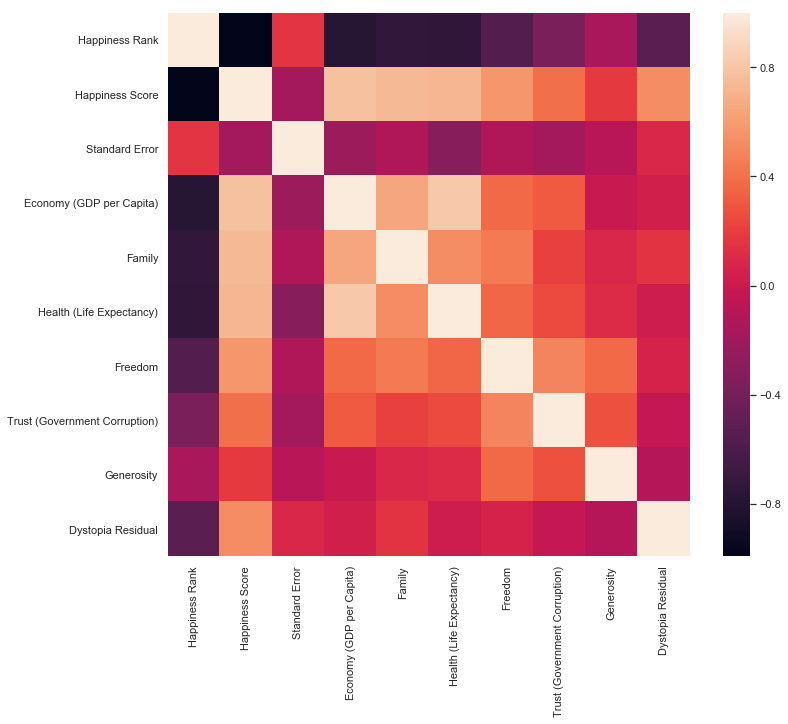

In [36]:
sns.set(rc={'figure.figsize':(11.7,10)})
sns.heatmap(data.corr())

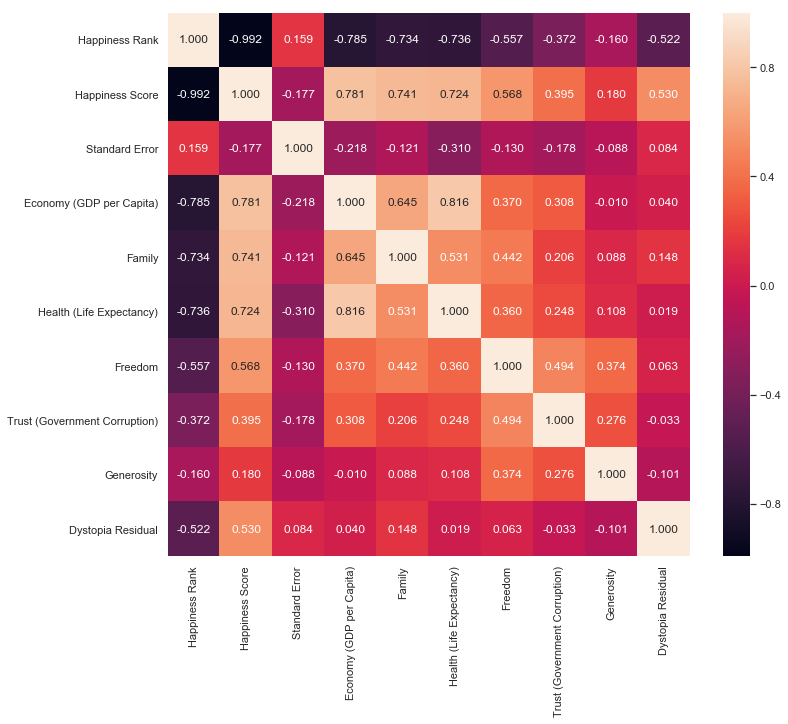

In [37]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

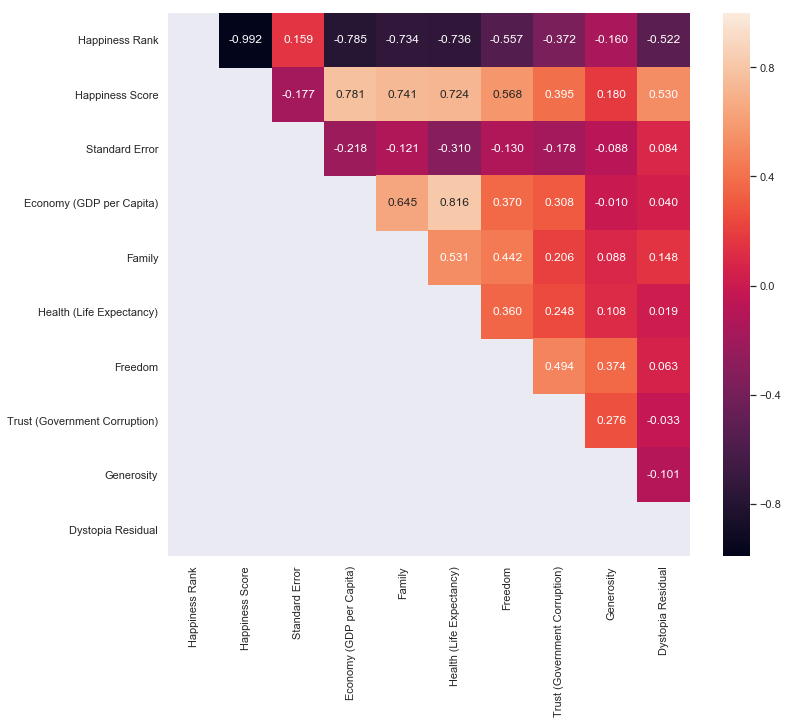

In [38]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

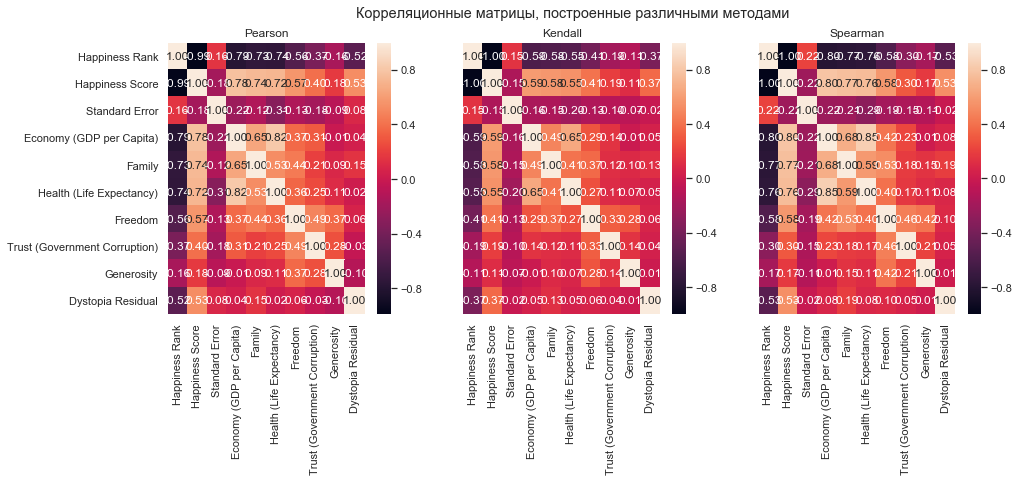

In [39]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Humidity и HumidityRatio, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/